# LLM-Empowered Agent-Based Simulation
## Macro-level Comparison of Two Experiments

This notebook demonstrates how micro-level cognitive differences
(memory + personality) lead to different macro-level dynamics,
following the evaluation framework proposed in
*Humanities and Social Sciences Communications (2024)*.


In [57]:
import matplotlib.pyplot as plt

In [60]:
class Agent:
    def __init__(self, agent_id, personality):
        self.id = agent_id
        self.personality = personality
        self.position = 0
        self.speed = 0
        self.memory = []

    def perceive(self, front_agent):
        if front_agent is None:
            return float('inf')
        return front_agent.position - self.position

    def reason(self, distance):
        recently_in_danger = "danger" in self.memory[-2:]

        if recently_in_danger:
            thought = "Recently perceived danger, acting cautiously"
            action = "slow"
        else:
            if distance < 2:
                thought = "Too close, braking"
                action = "brake"
                self.memory.append("danger")

                # Memory decay (keep last 3 memories)
                if len(self.memory) > 3:
                    self.memory.pop(0)

            else:
                thought = "Safe distance"
                action = "move" if self.personality == "aggressive" else "slow"

        return action, thought

    def act(self, action):
        if action == "brake":
            self.speed = max(0, self.speed - 2)
        elif action == "slow":
            self.speed = max(0, self.speed - 1)
        elif action == "move":
            self.speed = min(5, self.speed + 1)

        self.position += self.speed


In [61]:
def run_simulation(personalities, steps=10):
    agents = [Agent(i, p) for i, p in enumerate(personalities)]

    speed_history = {i: [] for i in range(len(agents))}

    for step in range(steps):
        actions = []

        for i, agent in enumerate(agents):
            front = agents[i - 1] if i > 0 else None
            distance = agent.perceive(front)
            action, thought = agent.reason(distance)
            actions.append(action)

        for agent, action in zip(agents, actions):
            agent.act(action)

        for agent in agents:
            speed_history[agent.id].append(agent.speed)

    return speed_history


In [62]:
exp1_personalities = ["aggressive", "cautious", "cautious"]
exp1_speeds = run_simulation(exp1_personalities)

In [63]:
exp2_personalities = ["cautious", "cautious", "cautious"]
exp2_speeds = run_simulation(exp2_personalities)



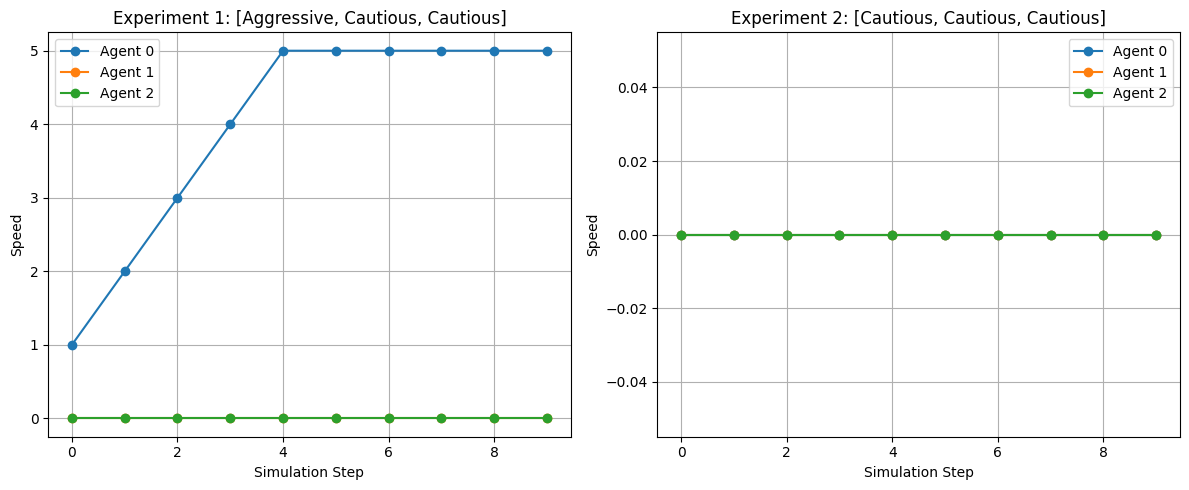

In [64]:
plt.figure(figsize=(12, 5))

# Experiment 1
plt.subplot(1, 2, 1)
for agent_id, speeds in exp1_speeds.items():
    plt.plot(speeds, marker='o', label=f"Agent {agent_id}")
plt.title("Experiment 1: [Aggressive, Cautious, Cautious]")
plt.xlabel("Simulation Step")
plt.ylabel("Speed")
plt.legend()
plt.grid(True)

# Experiment 2
plt.subplot(1, 2, 2)
for agent_id, speeds in exp2_speeds.items():
    plt.plot(speeds, marker='o', label=f"Agent {agent_id}")
plt.title("Experiment 2: [Cautious, Cautious, Cautious]")
plt.xlabel("Simulation Step")
plt.ylabel("Speed")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Analysis

The comparison clearly demonstrates that changing agent-level
cognitive traits (personality + memory) leads to significantly
different macro-level dynamics.

- Experiment 1 exhibits queue formation and freezing behavior.
- Experiment 2 shows smoother and more homogeneous speed patterns.

This validates the claim in the survey paper that memory-driven
LLM-inspired agents can generate emergent system-level phenomena.
